In [58]:
import pandas as pd
import numpy as np
import json


import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib inline

In [2]:
file_name = 'USvideos.csv' # change this to change country
my_df = pd.read_csv(file_name, index_col='video_id')
my_df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
video_id,,,,,,,,,,,,,,,
2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [3]:
# to create a dictionary that maps `category_id` to `category`
id_to_category = {}

with open('US_category_id.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        id_to_category[int(category['id'])] = category['snippet']['title']

id_to_category

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [4]:
# Maps the category ids to the english version of categories
my_df.insert(4, 'category', my_df['category_id'].map(id_to_category))
my_df.head()

,trending_date,title,channel_title,category_id,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
video_id,,,,,,,,,,,,,,,,
2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,People & Blogs,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,Entertainment,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,Comedy,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,Entertainment,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,Entertainment,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [5]:
category_count = my_df['category'].value_counts() # frequency for each category
category_count

Entertainment            9964
Music                    6472
Howto & Style            4146
Comedy                   3457
People & Blogs           3210
News & Politics          2487
Science & Technology     2401
Film & Animation         2345
Sports                   2174
Education                1656
Pets & Animals            920
Gaming                    817
Travel & Events           402
Autos & Vehicles          384
Nonprofits & Activism      57
Shows                      57
Name: category, dtype: int64

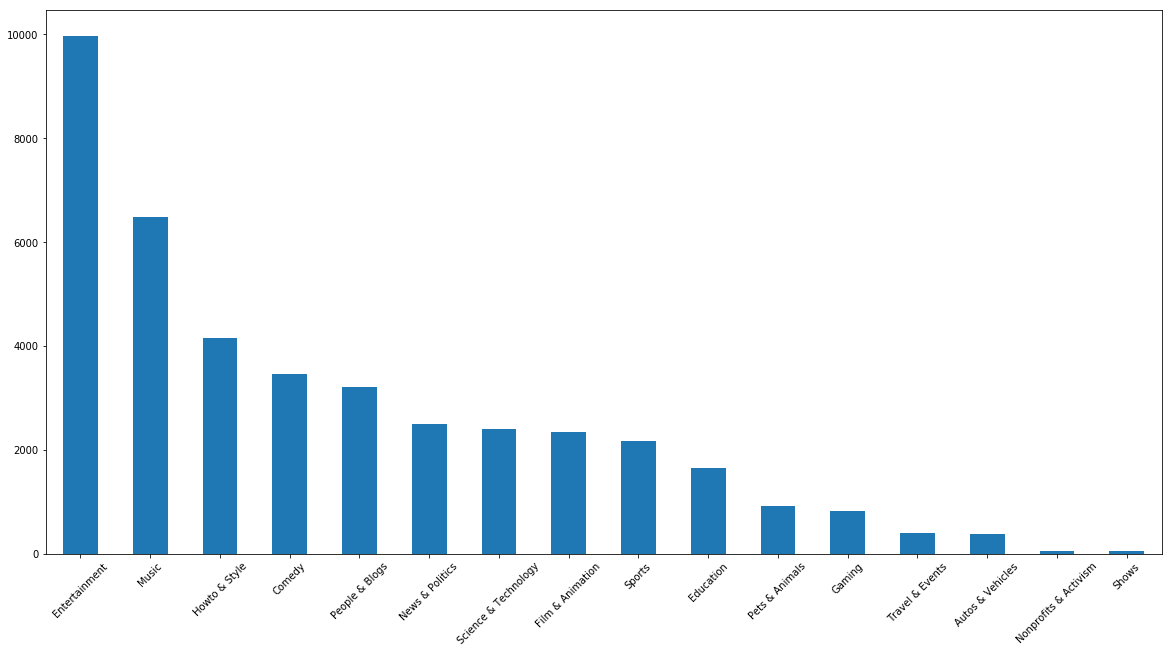

In [6]:
plt.figure(figsize=(20,10))
ax = category_count.plot.bar()
ax.set_xticklabels(labels=category_count.index, rotation=45, fontsize=10)
plt.show()

In [7]:
my_df['publish_time'] = pd.to_datetime(my_df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
my_df['publish_month'] = my_df['publish_time'].dt.month.map(str) + '-' + my_df['publish_time'].dt.year.map(str)

In [12]:
my_df.head()

,trending_date,title,channel_title,category_id,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_month
video_id,,,,,,,,,,,,,,,,,
2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,People & Blogs,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,11-2017
1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,Entertainment,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",11-2017
5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,Comedy,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,11-2017
puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,Entertainment,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,11-2017
d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,Entertainment,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,11-2017


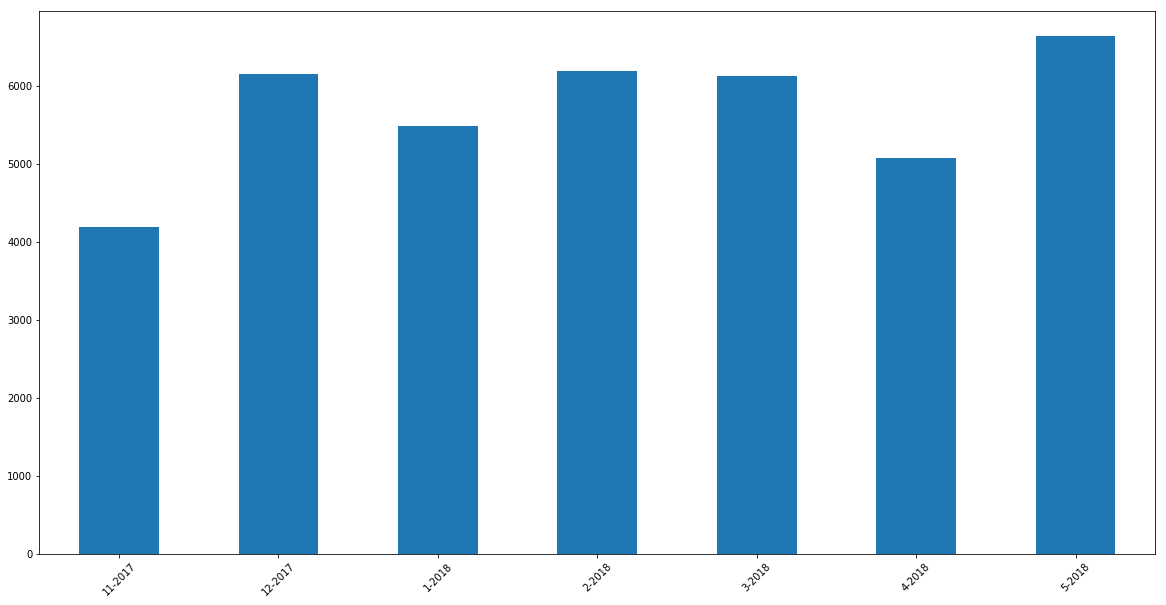

In [51]:
# How the list of all trending videos have been trending

test = my_df['publish_month'].value_counts()[:7]
test = test.reindex(index=['11-2017','12-2017','1-2018','2-2018','3-2018','4-2018','5-2018'])
plt.figure(figsize=(20,10))
ax = test.plot.bar()
ax.set_xticklabels(labels=test.index, rotation=45, fontsize=10)
plt.show()

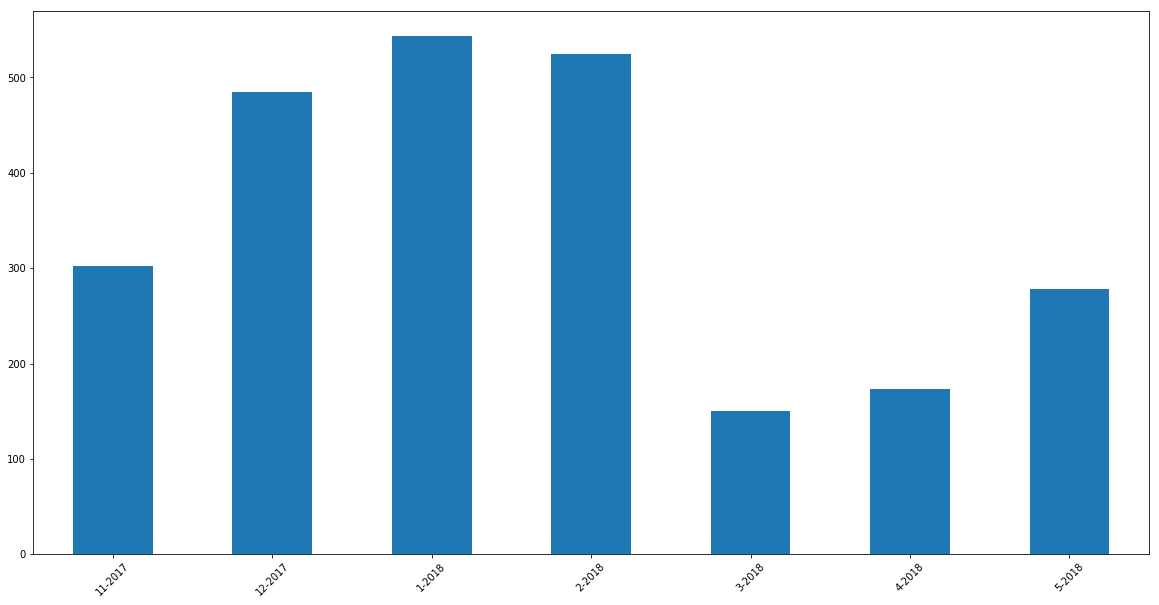

In [52]:
# How the list of only News & Politics videos have been trending. There is a clear spike in late 2017 
# and early '18 and then drop.

test = my_df[my_df.category == "News & Politics"].publish_month.value_counts()[:7]
test = test.reindex(index=['11-2017','12-2017','1-2018','2-2018','3-2018','4-2018','5-2018'])
plt.figure(figsize=(20,10))
ax = test.plot.bar()
ax.set_xticklabels(labels=test.index, rotation=45, fontsize=10)
plt.show()

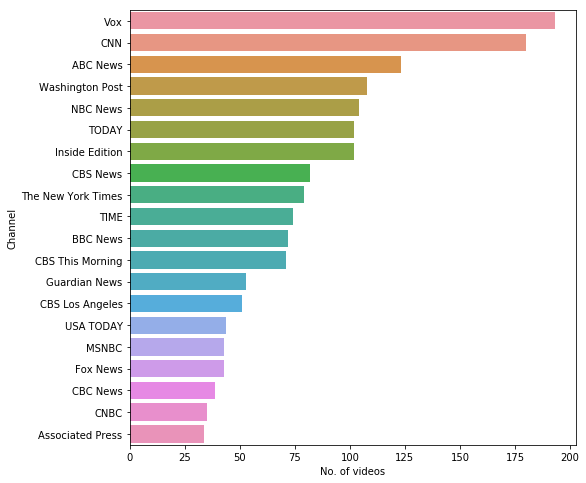

In [96]:
# Which of the channels inside News & Politics have the most videos appearing in Trending?

cdf = my_df[my_df.category == "News & Politics"].groupby("channel_title").size().reset_index(name="video_count").sort_values("video_count", ascending=False).head(20)
fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf, ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

In [98]:
#Analysing likelihood of comments being disabled per video category

comments_disabled_perc = {}
comments_disabled_perc["Music"] = my_df[my_df.category == "Music"]["comments_disabled"].value_counts(normalize=True)[1]
comments_disabled_perc["News & Politics"] = my_df[my_df.category == "News & Politics"]["comments_disabled"].value_counts(normalize=True)[1]
comments_disabled_perc["Entertainment"] = my_df[my_df.category == "Entertainment"]["comments_disabled"].value_counts(normalize=True)[1]
comments_disabled_perc["Comedy"] = my_df[my_df.category == "Comedy"]["comments_disabled"].value_counts(normalize=True)[1]
comments_disabled_perc["People & Blogs"] = my_df[my_df.category == "People & Blogs"]["comments_disabled"].value_counts(normalize=True)[1]
comments_disabled_perc["Howto & Style"] = my_df[my_df.category == "Howto & Style"]["comments_disabled"].value_counts(normalize=True)[1]
comments_disabled_perc

{'Comedy': 0.0005785363031530228,
 'Entertainment': 0.019670814933761542,
 'Howto & Style': 0.0026531596719729859,
 'Music': 0.0013906056860321385,
 'News & Politics': 0.069963811821471655,
 'People & Blogs': 0.020560747663551402}

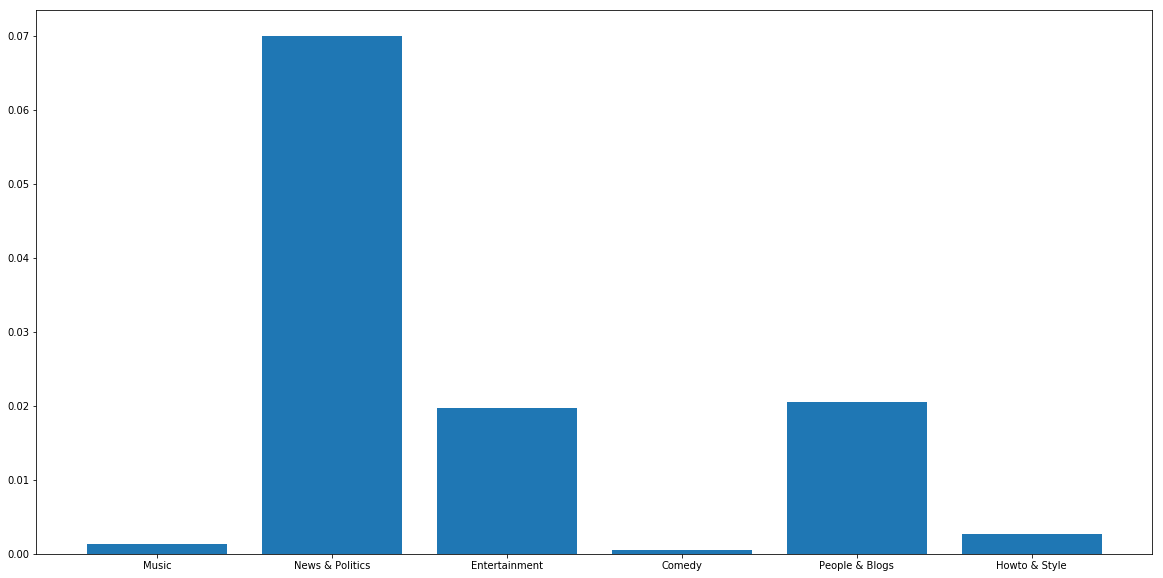

In [99]:
plt.figure(figsize=(20,10))
plt.bar(range(len(comments_disabled_perc)), list(comments_disabled_perc.values()), align='center')
plt.xticks(range(len(comments_disabled_perc)), list(comments_disabled_perc.keys()))
plt.show()